# Project One – Supervised Machine Learning

### Housing Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Housing Prices.csv")

|     Field     |                         Description                         |                                           |
|:-------------:|:-----------------------------------------------------------:|:-----------------------------------------:|
|     Rooms     | Number of rooms                                             |                                           |
|     Price     | Price in dollars                                            |                                           |
|     Method    | S                                                           | Property sold                             |
|               | SP                                                          | Property sold prior                       |
|               | PI                                                          | Property passed in                        |
|               | PN                                                          | Sold prior not   disclosed                |
|               | SN                                                          | Sold not disclosed                        |
|               | NB                                                          | No bid                                    |
|               | VB                                                          | Vendor bid                                |
|               | W                                                           | Withdrawn prior to   auction              |
|               | SA                                                          | Sold after auction                        |
|               | SS                                                          | Sold after auction   price not disclosed. |
|               | N/A                                                         | Price or highest bid   not available      |
|      Type     | br                                                          | Bedroom(s)                                |
|               | h                                                           | House, cottage,   villa, semi, terrace    |
|               | u                                                           | Unit, duplex                              |
|               | t                                                           | Townhouse                                 |
|               | dev site                                                    | Development site                          |
|               | o res                                                       | Other residential.                        |
|    SellerG    | Real Estate Agent                                           |                                           |
|      Date     | Date sold                                                   |                                           |
|    Distance   | Distance from CBD                                           |                                           |
|   Regionname  | General Region (West, North   West, North, North east …etc) |                                           |
| Propertycount | Number of properties that   exist in the suburb.            |                                           |
|   Bedroom2    | Scraped # of Bedrooms (from   different source)             |                                           |
|    Bathroom   | Number of Bathrooms                                         |                                           |
|      Car      | Number of carspots                                          |                                           |
|    Landsize   | Land Size                                                   |                                           |
|  BuildingArea | Building Size                                               |                                           |
|  CouncilArea  | Governing council for the   area                            |                                           |

In [3]:
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
df.shape

(13580, 21)

### Checking how many missing values are there in each coloumn

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

we can see that there are some missing data in coloumn **Car, BuildingArea, YearBuit, and CouncilArea.**

Missing data present various problems:
1. The absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. 
2. The lost data can cause bias in the estimation of parameters. 
3. It can reduce the representativeness of the samples. 
4. It may complicate the analysis of the data.

### Filling the missing data

#### 1. Car

In [7]:
df['Car'].value_counts()

2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [8]:
df['Car'].mean()

1.6100754549489569

In [9]:
df['Car'] = df['Car'].fillna(df['Car'].mean())

#### 2. BuildingArea

In [10]:
df['BuildingArea'].value_counts()

120.00    114
110.00     89
100.00     88
130.00     84
115.00     77
         ... 
113.81      1
134.60      1
82.60       1
165.50      1
477.00      1
Name: BuildingArea, Length: 602, dtype: int64

In [11]:
df['BuildingArea'].mean()

151.96764988779805

In [12]:
df['BuildingArea'].median()

126.0

In [13]:
df['BuildingArea'].mode()

0    120.0
dtype: float64

In [14]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())

#### 3. YearBuilt

Based on the neighborhood year built

In [15]:
df['YearBuilt'] = df['YearBuilt'].fillna(df.groupby('Suburb')['YearBuilt'].transform('median'))

For the building with no other houses in the same YearBuilt

In [16]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

#### 4. CouncilArea

In [17]:
df['CouncilArea'] = df['CouncilArea'].fillna(df.CouncilArea.mode()[0])

Now check if there is still any null data

In [18]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Handleing categorized data

#### Label Encoding for object to numeric conversion

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### 1.Suburb

In [22]:
df.Suburb.value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Whittlesea          1
Plumpton            1
Riddells Creek      1
Bacchus Marsh       1
Upwey               1
Name: Suburb, Length: 314, dtype: int64

Suburb have 314 values. We can encode it by frequency encoder.

In [23]:
sur = df.groupby('Suburb').size()/len(df)

In [24]:
df.loc[:, 'Suburb_freq'] = df['Suburb'].map(sur)

#### 2. Type

In [25]:
df.Type.value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [26]:
df['Type_label'] = le.fit_transform(df.Type)

h= 0,  t=1, u=2

#### 3. Method

In [27]:
df.Method.value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [28]:
df['Method_label'] = le.fit_transform(df.Method)

PI=0, S=1, SA=2 SP=3, VB=4

#### 4. SellerG

In [29]:
df.SellerG.value_counts()

Nelson                     1565
Jellis                     1316
hockingstuart              1167
Barry                      1011
Ray                         701
                           ... 
Direct                        1
Victory                       1
Community                     1
Property                      1
hockingstuart/Advantage       1
Name: SellerG, Length: 268, dtype: int64

In [30]:
seller = df.groupby('SellerG').size()/len(df)

In [31]:
df.loc[:, 'SellerG_freq'] = df['SellerG'].map(seller)

#### 5. Postcode

In [32]:
df.Postcode.value_counts()

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3775.0      1
3765.0      1
3115.0      1
3431.0      1
3756.0      1
Name: Postcode, Length: 198, dtype: int64

In [33]:
posts = df.groupby('Postcode').size()/len(df)

In [34]:
df.loc[:, 'Postcode_freq'] = df['Postcode'].map(posts)

#### 6. CouncilArea

In [35]:
df.CouncilArea.value_counts()

Moreland             2532
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64

In [36]:
council = df.groupby('CouncilArea').size()/len(df)

In [37]:
df.loc[:, 'CouncilArea_freq'] = df['CouncilArea'].map(council)

#### 7. Regionname

In [38]:
df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [39]:
df['Regionname_label'] = le.fit_transform(df.Regionname)

Eastern Metropolitan=0, 
Eastern Victoria=1,
Northern Metropolitan=2,
Northern Victoria=3,
South-Eastern Metropolitan=4, 
Southern Metropolitan=5, 
Western Metropolitan=6,
Western Victoria=7,

####  Date

Dividing date into day, month and Year

In [40]:
dd, mm, yy = [], [], []

for date in df['Date']:
    d, m, y = list(map(int, date.split('/')))
    dd.append(d)
    mm.append(m)
    yy.append(y)

In [41]:
df["DaySold"] = dd
df["MonthSold"] = mm
df["YearSold"] = yy

In [42]:
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Suburb_freq  Type_label  Method_label  \
0  3/12/2016       2.5    3067.0  ...     0.004124           0             1   
1  4/02/2016       2.5    3067.0  ...     0.004124           0             1   
2  4/03/2017       2.5    3067.0  ...     0.004124           0             3   
3  4/03/2017       2.5    3067.0  ...     0.004124           0             0   
4  4/06/2016       2.5    3067.0  ...     0.004124           0             4   

   SellerG_freq  Postcode_freq  CouncilArea_freq Regionname_label  DaySold  \
0      0.028940       0.004124          0.047644                2        3   
1      0.028940       0.004124          0.047644                2        4   
2      0.028940       0.004124          0.047644                2        4   
3      0.028940       0.004124          0.047644                2        4   
4      0.115243       0.004124          0.047644                2        4   

   MonthSold YearSold  
0         12     2016  
1          2     2016  
2          3     2017  
3          3     2017  
4          6     2016  

[5 rows x 31 columns]

In [43]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Suburb_freq',
       'Type_label', 'Method_label', 'SellerG_freq', 'Postcode_freq',
       'CouncilArea_freq', 'Regionname_label', 'DaySold', 'MonthSold',
       'YearSold'],
      dtype='object')

In [44]:
husing_price_df = df[['Suburb_freq', 'Rooms', 'Type_label', 'Price', 'Method_label', 'SellerG_freq', 'DaySold',
                      'MonthSold', 'YearSold', 'Distance', 'Postcode_freq', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
                      'BuildingArea', 'YearBuilt', 'CouncilArea_freq', 'Lattitude', 'Longtitude', 'Regionname_label',
                      'Propertycount'  
                     ]]

# Feature Engenerring

In [45]:
husing_price_df['age'] = husing_price_df['YearSold'] - husing_price_df['YearBuilt']

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Handeling Outliers

#### 1. Car

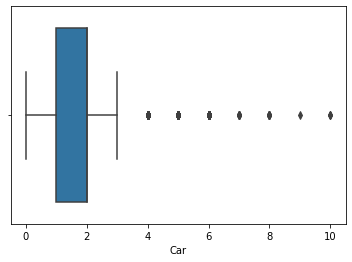

In [46]:
sns.boxplot(husing_price_df['Car'])

IQR Method of Outlier Detection

Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.

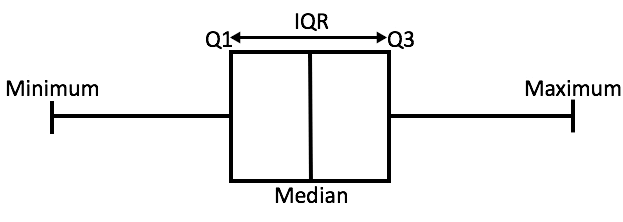

In [47]:
feat = 'Car'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr 
upr=q3+1.5*iqr
low,upr

(-0.5, 3.5)

In [48]:
def imputaion(value):
    if value > upr:
        return upr
    if value < low:
        return low
    else:
        return value
    
husing_price_df['Car']=husing_price_df['Car'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


#### 2. Price

In [49]:
"{:,}".format(husing_price_df['Price'].max())

'9,000,000.0'

In [50]:
"{:,}".format(husing_price_df['Price'].min())

'85,000.0'

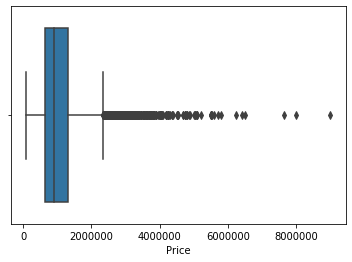

In [51]:
sns.boxplot(husing_price_df['Price'])

In [52]:
feat = 'Price'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upr=q3+1.5*iqr
"{:,}".format(low),"{:,}".format(upr)

('-370,000.0', '2,350,000.0')

In [53]:
husing_price_df['Price']=husing_price_df['Price'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


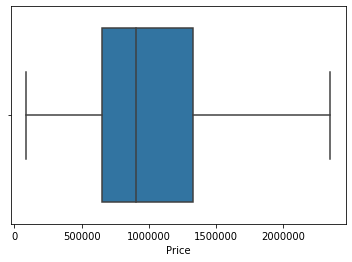

In [54]:
sns.boxplot(husing_price_df['Price'])

#### 3.Landsize

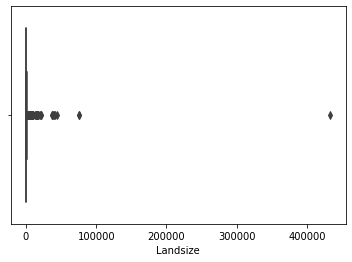

In [55]:
sns.boxplot(husing_price_df['Landsize'])

In [56]:
husing_price_df['Landsize'].value_counts()

0.0       1939
650.0      103
697.0       71
700.0       48
585.0       47
          ... 
1409.0       1
1890.0       1
1240.0       1
2920.0       1
8220.0       1
Name: Landsize, Length: 1448, dtype: int64

In [57]:
feat = 'Landsize'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upr=q3+1.5*iqr
"{:,}".format(low),"{:,}".format(upr)

('-534.0', '1,362.0')

In [58]:
husing_price_df['Landsize']=husing_price_df['Landsize'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 4. Bathroom

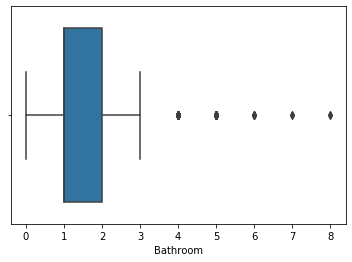

In [59]:
sns.boxplot(husing_price_df['Bathroom'])

In [60]:
feat = 'Bathroom'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upr=q3+1.5*iqr
"{:,}".format(low),"{:,}".format(upr)

('-0.5', '3.5')

In [61]:
husing_price_df['Bathroom']=husing_price_df['Bathroom'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 5. BuildingArea

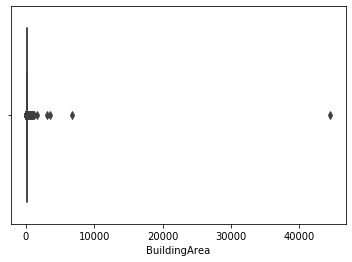

In [62]:
sns.boxplot(husing_price_df['BuildingArea'])

In [63]:
feat = 'BuildingArea'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upr=q3+1.5*iqr
"{:,}".format(low),"{:,}".format(upr)

('110.09', '141.85')

In [64]:
husing_price_df['BuildingArea']=husing_price_df['BuildingArea'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 6. Rooms

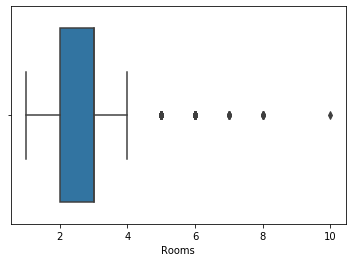

In [65]:
sns.boxplot(husing_price_df['Rooms'])

In [66]:
feat = 'Rooms'
q1=husing_price_df[feat].quantile(0.25)
q3=husing_price_df[feat].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upr=q3+1.5*iqr
"{:,}".format(low),"{:,}".format(upr)

('0.5', '4.5')

In [67]:
husing_price_df['Rooms']=husing_price_df['Rooms'].apply(imputaion)

/Users/Mubdu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
husing_price_df.duplicated().sum()

0

# Exploratory data analysis

Overview of the data

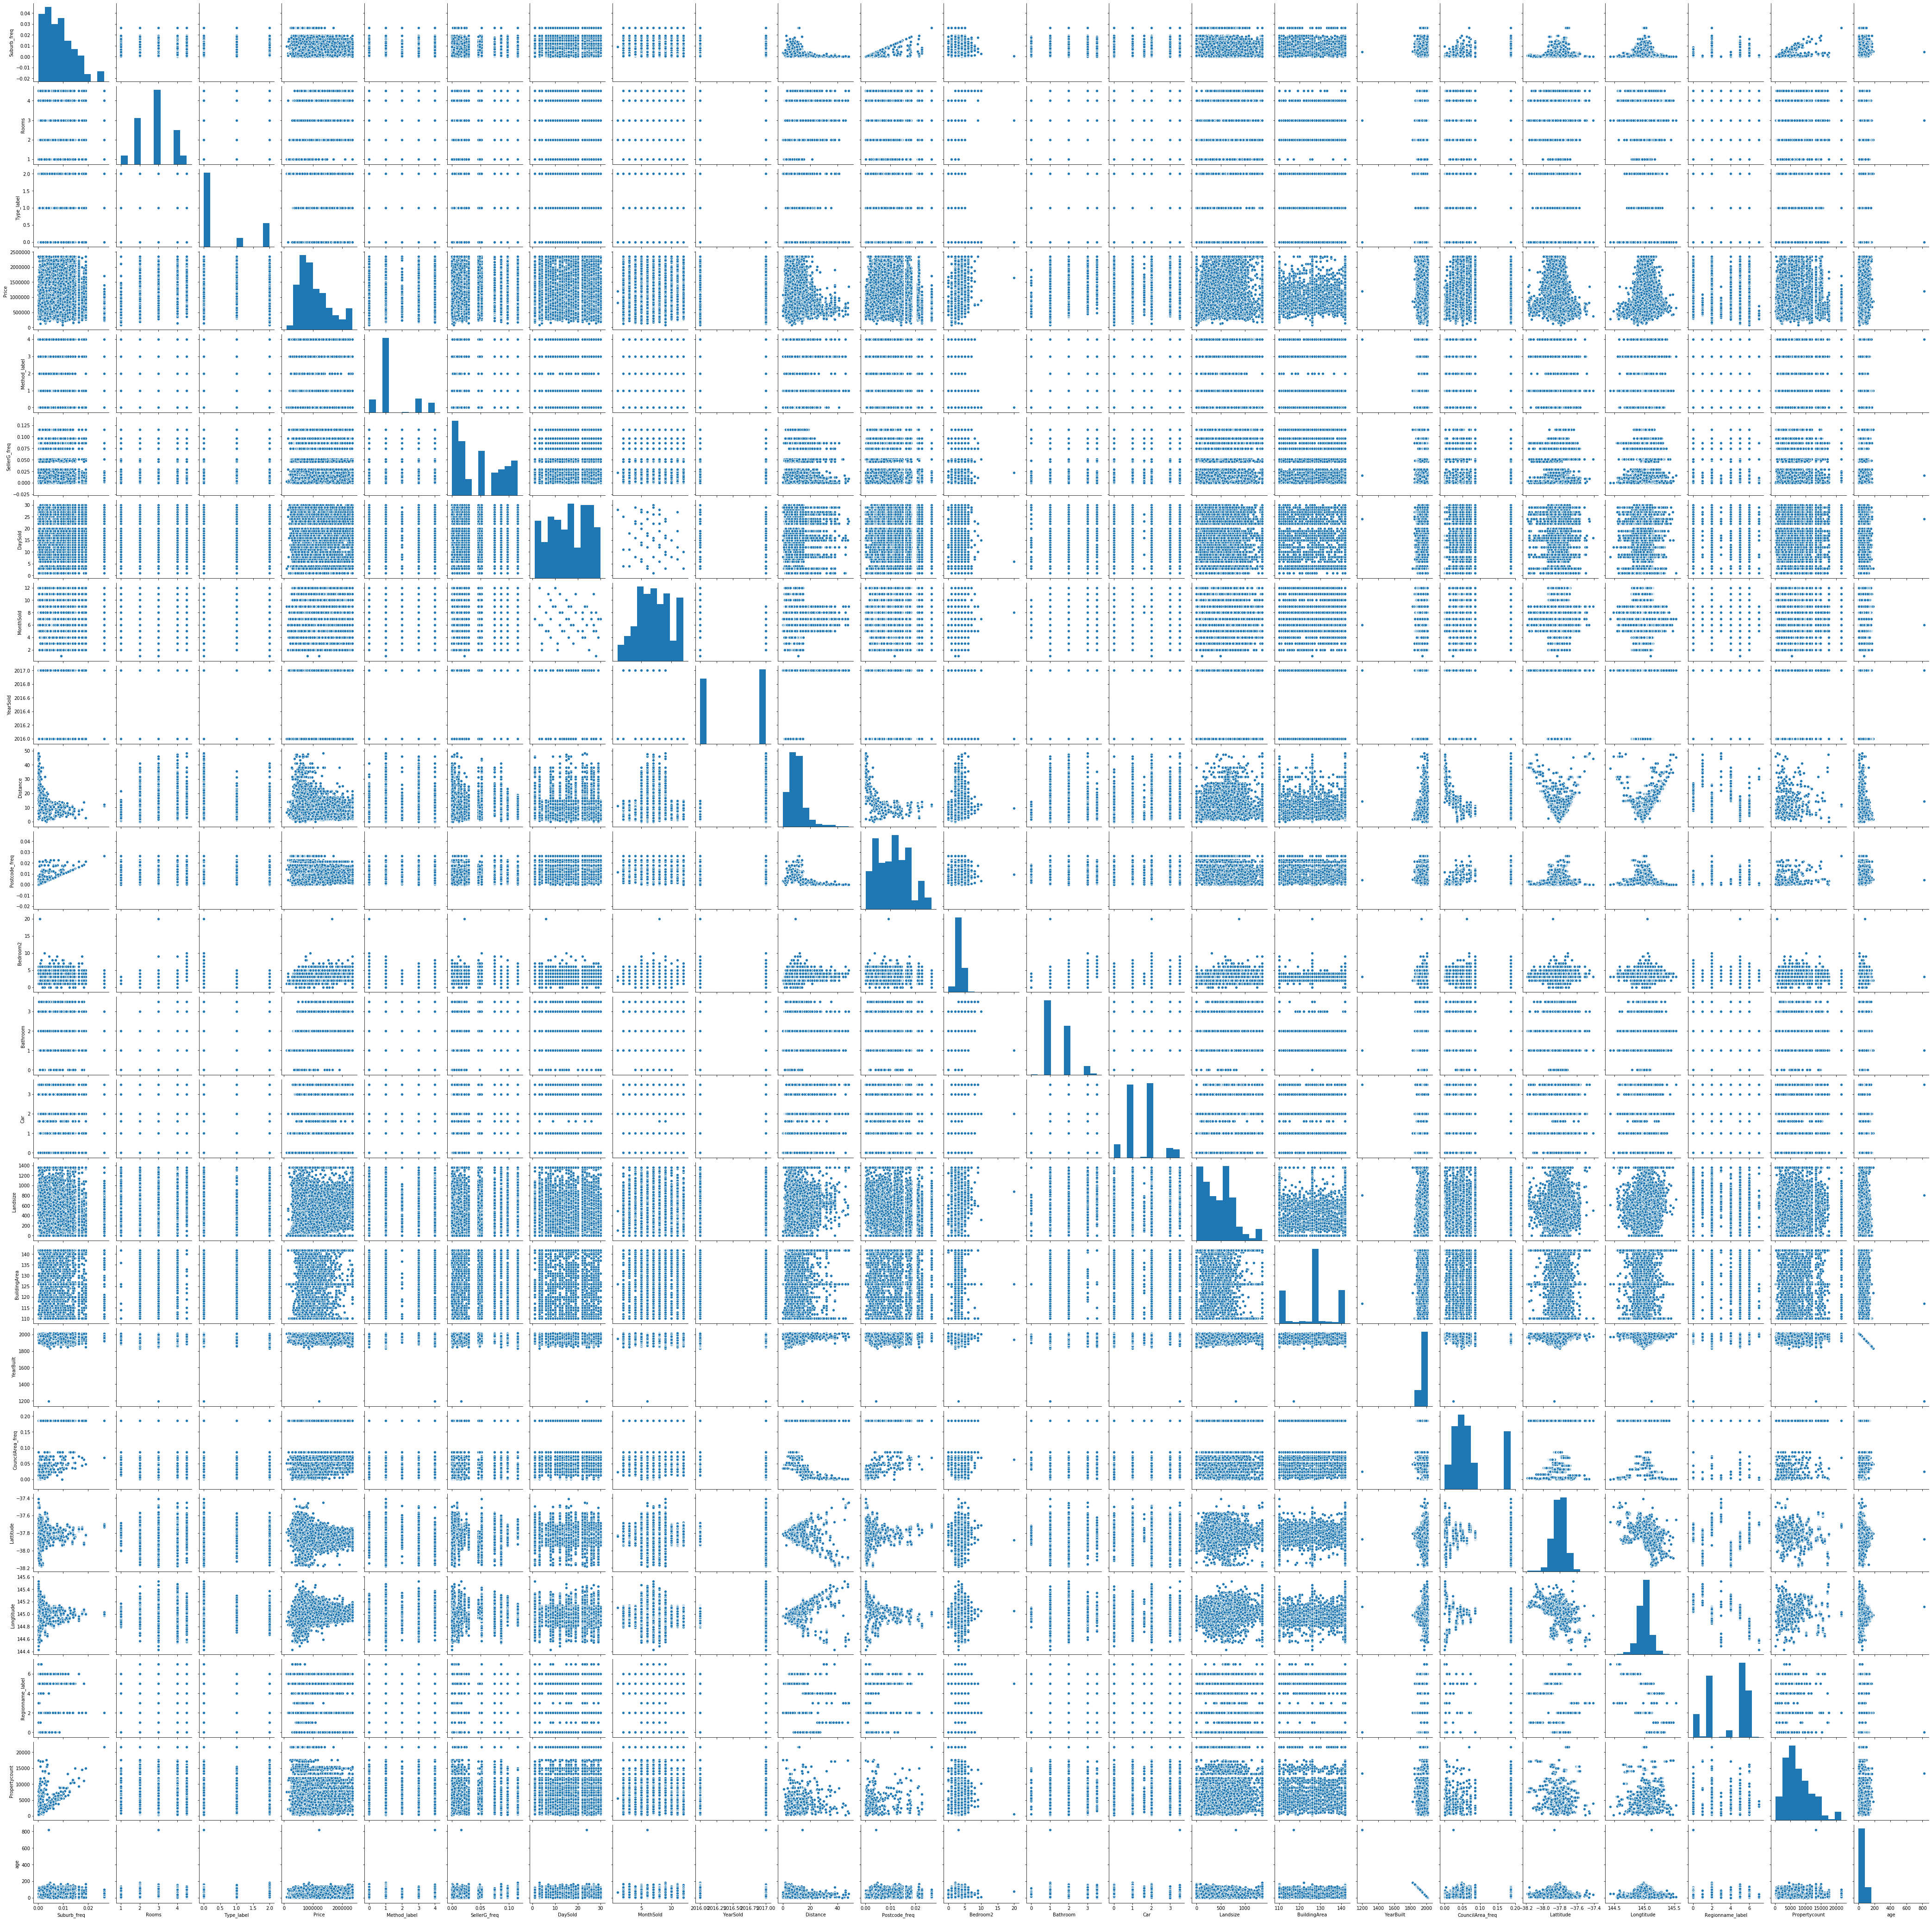

In [69]:
sns.pairplot(husing_price_df)

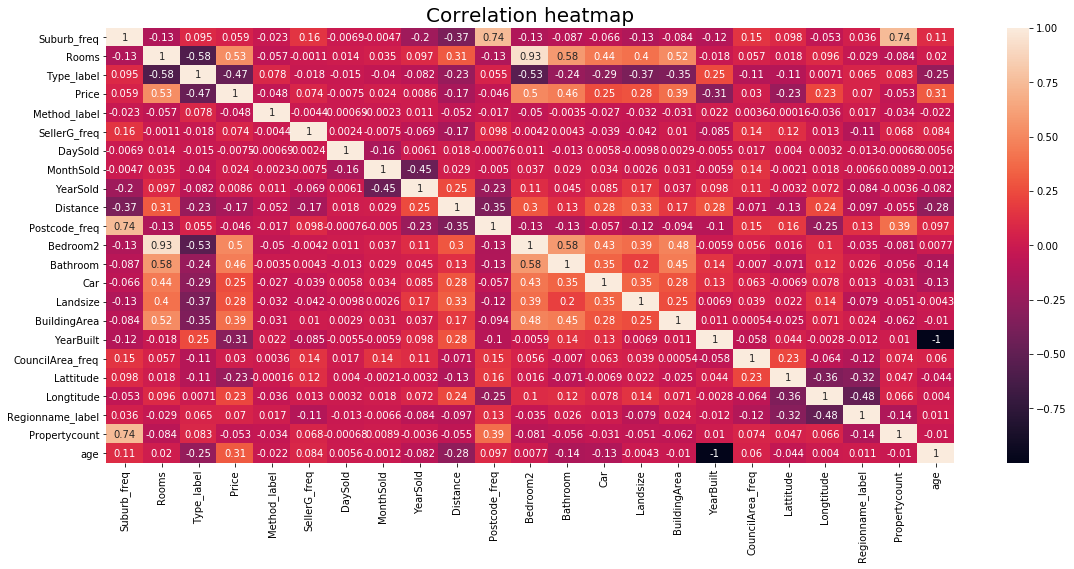

In [70]:
plt.figure(figsize=(19,8))
plt.title('Correlation heatmap', fontsize=20)
sns.heatmap(husing_price_df.corr(), annot = True)

From the heatmap we can see that Price correlate mostly with Bedroom2, Rooms, BuildingArea and Bathroom

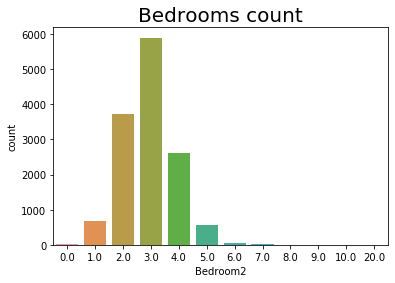

In [71]:
plt.title('Bedrooms count', fontsize=20)
sns.countplot(husing_price_df['Bedroom2'])

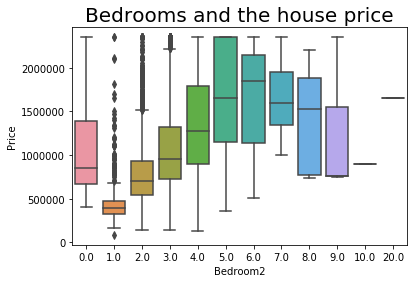

In [72]:
plt.title('Bedrooms and the house price', fontsize=20)
sns.boxplot(x=husing_price_df['Bedroom2'], y=husing_price_df['Price'])

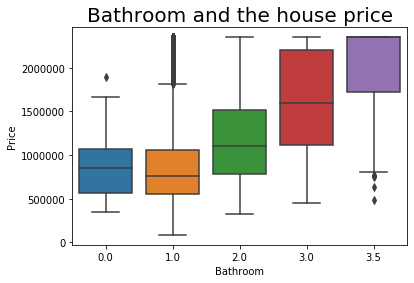

In [73]:
plt.title('Bathroom and the house price', fontsize=20)
sns.boxplot(x=husing_price_df['Bathroom'], y=husing_price_df['Price'])

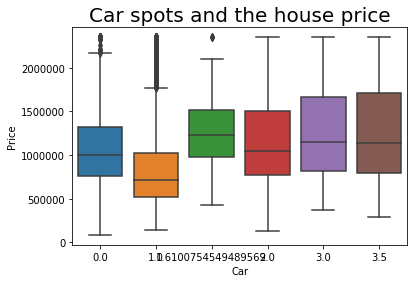

In [74]:
plt.title('Car spots and the house price', fontsize=20)
sns.boxplot(x=husing_price_df['Car'], y=husing_price_df['Price'])

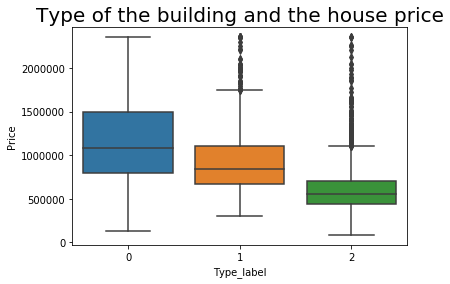

In [75]:
plt.title('Type of the building and the house price', fontsize=20)
sns.boxplot(x=husing_price_df['Type_label'], y=husing_price_df['Price'])
#['0=house', '1=townhouse', '2=unit']


In [76]:
husing_price_df.columns

Index(['Suburb_freq', 'Rooms', 'Type_label', 'Price', 'Method_label',
       'SellerG_freq', 'DaySold', 'MonthSold', 'YearSold', 'Distance',
       'Postcode_freq', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea_freq', 'Lattitude',
       'Longtitude', 'Regionname_label', 'Propertycount', 'age'],
      dtype='object')

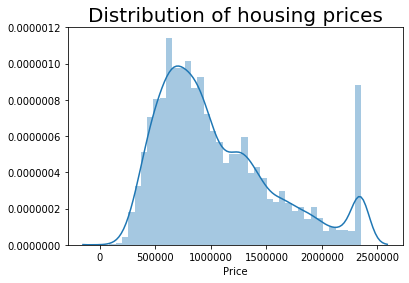

In [77]:
plt.title('Distribution of housing prices', fontsize=20)
sns.distplot(husing_price_df['Price'])

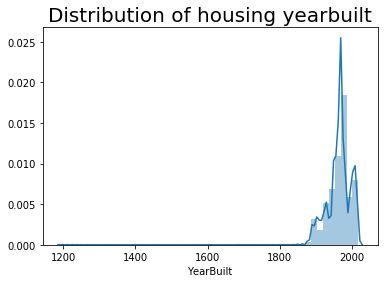

In [78]:
plt.title('Distribution of housing yearbuilt', fontsize=20)
sns.distplot(husing_price_df['YearBuilt'])
plt.show()

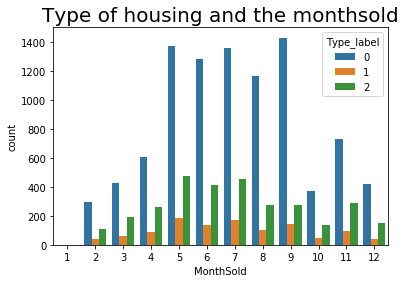

In [79]:
plt.title('Type of housing and the monthsold', fontsize=20)
sns.countplot(husing_price_df['MonthSold'], hue=husing_price_df['Type_label'])

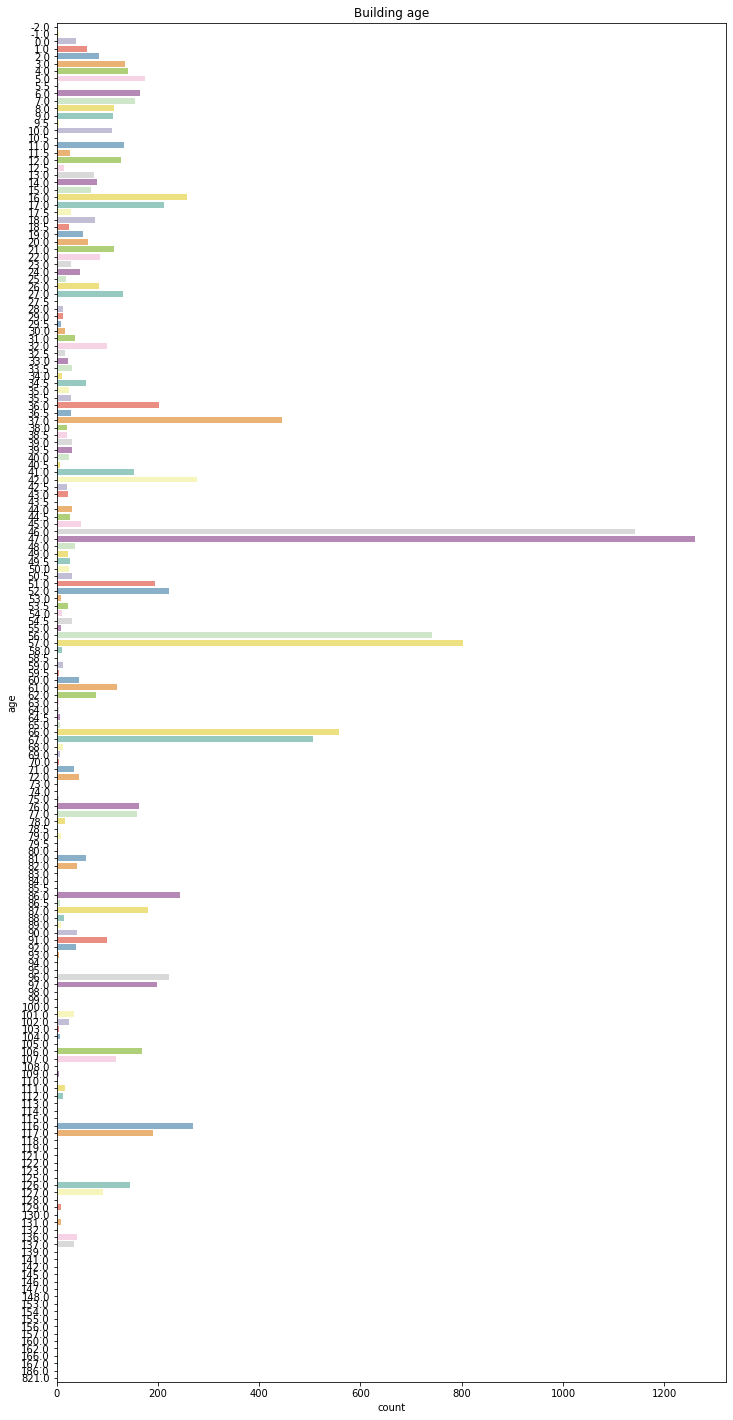

In [80]:
plt.figure(figsize=(12,25))
plt.title('Building age')
sns.countplot(y='age',data=husing_price_df,palette = "Set3")


# Machine Learning

In [81]:
X= husing_price_df.drop(columns=['Price'])
Y= husing_price_df['Price']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

#### Linear Regression Model

Linear Regression is used to predict continuous outputs where there is a linear relationship between the features of the dataset and the output variable.

In [83]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [84]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predictions=lr.predict(X_test)

#### Model Evaluation

1. A prediction score is between zero (0) and one (1)

In [86]:
lr_score = lr.score(X_test,Y_test)
lr_score

0.669855968681303

2. Mean Absolute Error, also known as MAE, is one of the many metrics for summarizing and assessing the quality of a machine learning model

In [87]:
from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(Y_test, predictions)
lr_mae

233932.8258920012

#### Decision Tree Regressor Model

Decision trees can be used for either classification or regression problems and are useful for complex datasets. They work by splitting the dataset, in a tree-like structure, into smaller and smaller subsets and then make predictions based on what subset a new example would fall into

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dt = DecisionTreeRegressor()

In [90]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [91]:
dt_predicted = dt.predict(X_test)

#### Model Evaluation

In [92]:
dt_score = dt.score(X_test, Y_test)
dt_score

0.7017451932311695

In [93]:
dt_mae = mean_absolute_error(dt_predicted, Y_test)
dt_mae

194713.9739813451

#### Random Forest Regressor Model


A random forest regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rfr = RandomForestRegressor()


In [96]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
rfr_predicted = rfr.predict(X_test)

#### Model Evaluation

In [98]:
rfr_score = rfr.score(X_test, Y_test)
rfr_score

0.8560578539263061

In [99]:
rfr_mae = mean_absolute_error(rfr_predicted, Y_test)
rfr_mae

140763.25874079528

### Summary

In [100]:
Models_scores  = [ ['Linear Reression Model',lr_score, lr_mae ],['Decision Tree Regressor Model', dt_score, dt_mae ],
                            
                                ['Random Forest Regressor Model', rfr_score, rfr_mae]]

ml_Scores  = pd.DataFrame(Models_scores, columns=['Model', 'Score', 'Mean Absolute Error']) 
ml_Scores.sort_values(by='Score', ascending= False)

Model     Score  Mean Absolute Error
2  Random Forest Regressor Model  0.856058        140763.258741
1  Decision Tree Regressor Model  0.701745        194713.973981
0         Linear Reression Model  0.669856        233932.825892